In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Importar los datos de precios de la acción
df = pd.read_csv("C:/Users/Rayzek/Documents/PROYECTOS/DATASETS/ACCIONES/AMZN.csv")
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

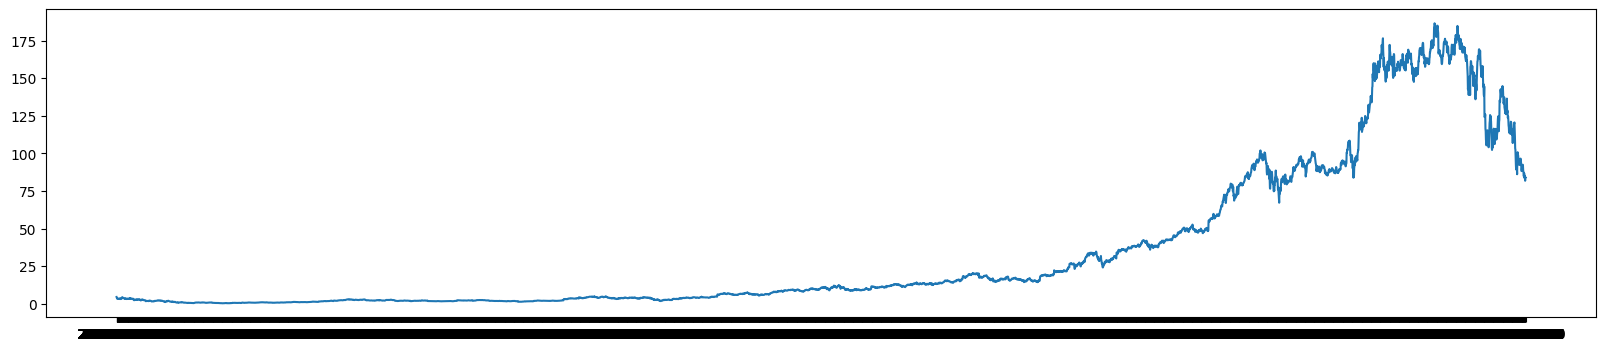

In [2]:
# LINEAS
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.plot(df['Date'], df['Close'])
plt.show()

In [ ]:

# Seleccionar las características que se utilizarán para predecir el precio
X = data[['open', 'high', 'low', 'volume']]

# Añadir una columna constante para representar el término independiente en la regresión
X = sm.add_constant(X)

# Seleccionar la variable objetivo, en este caso el precio de cierre
y = data['close']

# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar un modelo de regresión lineal utilizando la librería statsmodels
regression_model = sm.OLS(y_train, X_train)
regression_results = regression_model.fit()

# Realizar predicciones en el conjunto de prueba
y_pred = regression_results.predict(X_test)

# Calcular el error estándar de las predicciones
std_error = regression_results.mse_resid**0.5

# Calcular el Standard Error Band
se_band = 2 * std_error

# Graficar los resultados
plt.plot(y_test, label='Precio real')
plt.plot(y_pred, label='Precio predecido')
plt.fill_between(y_pred.index, y_pred-se_band, y_pred+se_band, alpha=0.2)
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print("El error absoluto medio es:", mae)
